In [1]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

from neuron import NeuronParam, SimpleNeuron
from synapse import Synapse
from encoding import RF_convolution, encode, RF_kernel
from parameter import TrainParam
from STDP import stdp


In [2]:
T = 200
dt = 1

t_pre = -20
t_post = 20

n1 = 28*28 # of neurons in layer 1
n2 = 3 # of neurons in layer 2

train_param = TrainParam(T = T,
                         dt = dt)
    
neuron_param = NeuronParam(t_refractory = 5,
                           V_rest = 0,
                           V_thr = 5,
                           V_min = -500,
                           leak = 0.03, 
                           record = True)

learning_rule = lambda x : stdp(x,
                                tau_pre = 5, 
                                tau_post = 8, 
                                A_pre = 0.3, 
                                A_post = 0.8)

In [3]:
timeline = np.arange(0,T+dt,dt)

layer1 = [SimpleNeuron(neuron_param) for _ in range(n1)]
layer2 = [SimpleNeuron(neuron_param) for _ in range(n2)]

synapse_1 = Synapse(n0,layer1)
synapse_2 = Synapse(n1,layer2)

synapse_1.identity_initialize(mult=3)
synapse_2.random_initialize(0,0.4)

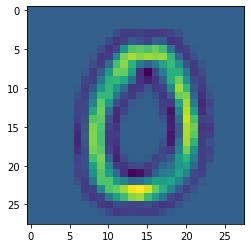

In [4]:
image = cv2.imread("data/0.png",0)
image = RF_convolution(image,RF_kernel)
plt.imshow(image)
plt.show()

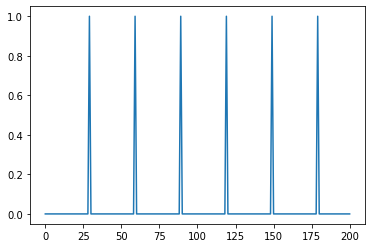

In [5]:
input_spiketrain = encode(image,train_param)
plt.plot(input_spiketrain[211])
plt.show()

In [6]:
adaptation = 30000./np.sum(image)

In [7]:
learn = True

layer1_spiketrain = []
layer2_spiketrain = []
for i,t in enumerate(timeline):
    input_spikes = input_spiketrain[:,i]
    layer1_spikes = synapse_1.run(input_spikes,t,adaptation)
    layer1_spiketrain.append(layer1_spikes)
    layer2_spikes = synapse_2.run(layer1_spikes,t,adaptation)
    layer2_spiketrain.append(layer2_spikes)
    
    if learn:
        for j,s in enumerate(layer2_spikes):
            if(s==1): #SPIKE
                for t_ in range(-1,t_pre-1, -1):
                    pass
                    

                    
#layer1_spiketrain = np.array(layer1_spiketrain).T
layer2_spiketrain = np.array(layer2_spiketrain).T

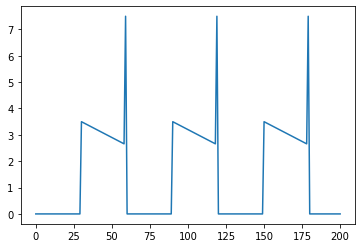

In [8]:
plt.plot(layer1[211].V_history)

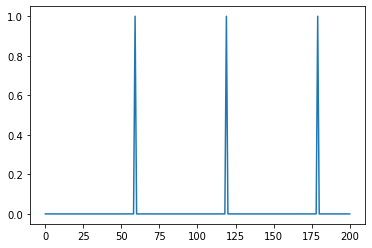

In [9]:
plt.plot(layer1_spiketrain[211,:])